## Predicting Diamond Price

In this data sciene project, I will develop a predictive model to estimate the price of diamonds based on their characteristics. Diamonds are not only precious gemstones but also carry a wide range of attributes that influence their value, such as carat weight, cut quality, color, and clarity. By creating a predictive model, you can help diamond buyers and sellers make more informed decisions and gain insights into the factors that drive diamond prices.

#### 1. Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### 2. Importing Dataset:
The dataset meticulously presents attributes that intricately detail the characteristics of individual diamonds. Each diamond is defined by attributes like carat weight, influencing its mass, and cut quality, impacting visual vrilliance. Color grade reveals hue, clarity detects imperfections, and depth provides proportion insight. Table width influences aesthetic. Price quantifies value, while dimensions ('x', 'y', 'z') offer precise measurements. These attributes collectively enable a predictive model for accurate diamond price forecasts, unveiling valuation insights.

In [2]:
dataframe = pd.read_csv('diamonds.csv')

#### 3. Exploratory Data Analysis
Exploratory Data Analysis (EDA) in the 'Predicting Diamond Price' project involves comprehensive attribute explorationm starting with statistics for central tendencies and distributions. Visualizations include histograms, box plots, and density plots for numeric attribute prevalence. Correlation analysis unveils numeric attribute connections via heatmaps, and scatter plots uncover interations with the target 'price'. Grouping, aggregation, and box plots illustrate with the target 'price'. Grouping, aggregation, and box plots illustrate categorical attribute influences. EDA also covers dimensionality reduction like PCA, outlier handing, missing value checks, and feature transformations. Insights from EDA inform preprocessing, guiding model construction for accurate diamond price prediction.

In [3]:
dataframe.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
dataframe.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [5]:
dataframe.shape

(53940, 11)

In [6]:
dataframe = dataframe.drop('Unnamed: 0', axis = 1)

In [7]:
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [8]:
dataframe.shape

(53940, 10)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
dataframe.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
dataframe.select_dtypes(include='object').head()

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2


In [12]:
print(dataframe['cut'].value_counts(), '\n', dataframe['color'].value_counts(), '\n', dataframe['clarity'].value_counts)

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64 
 G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64 
 <bound method IndexOpsMixin.value_counts of 0        SI2
1        SI1
2        VS1
3        VS2
4        SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 53940, dtype: object>


#### 3.1 Data Visualization:

Data visualization is pivotal in the 'Predicting Diamond Price' project's EDA, portraying attributes distribution through histograms and density plots. Box plots reveal central tendencies and outliers, while bar charts depict categorical attributes like cut, color, and clarity. Correlation heatmaps identify strong relationships, while scatter plots unveil interations with 'price'. Box plots by category enable price comparison, 3D scatter plots elucidate dimension relations, and violin plots capture price distributions. Interactive options offer deeper insights. These visualizations guide preprocessing and model construction for precise price prediction.

#### 3.1.1 Single Visualization:
Single box plot is a powerful visualization for the Predicting Diamond Price project EDA. It showcases how diamond prices differ across categories like 'cut', 'color', or 'clarity'. The plot displays median, quartile, and outliers for each category, providing immediate insights into attribute impact on prices.

<AxesSubplot:xlabel='price', ylabel='Count'>

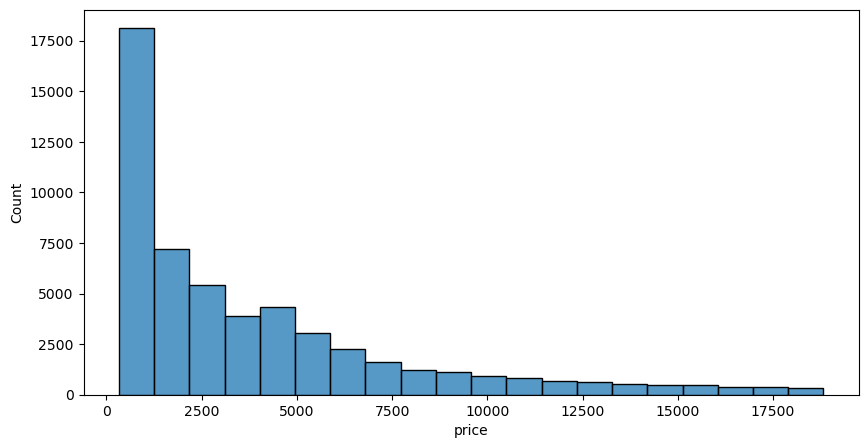

In [13]:
plt.figure(figsize=(10, 5))
sns.histplot(dataframe['price'], bins=20)

<AxesSubplot:xlabel='carat', ylabel='Count'>

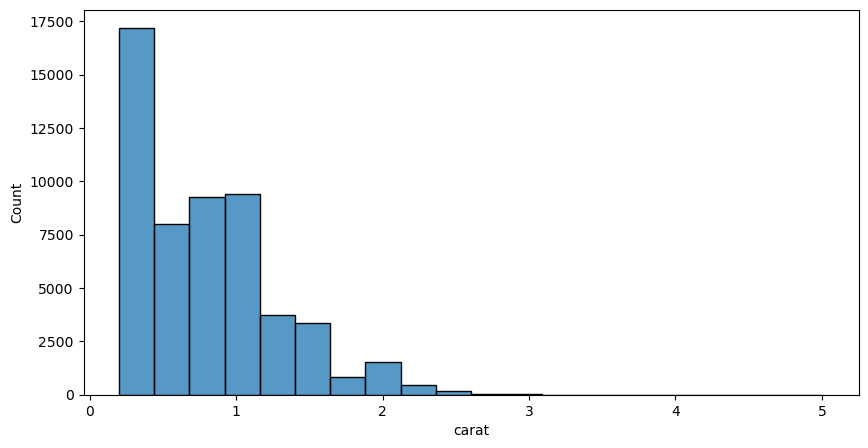

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(dataframe['carat'], bins=20)

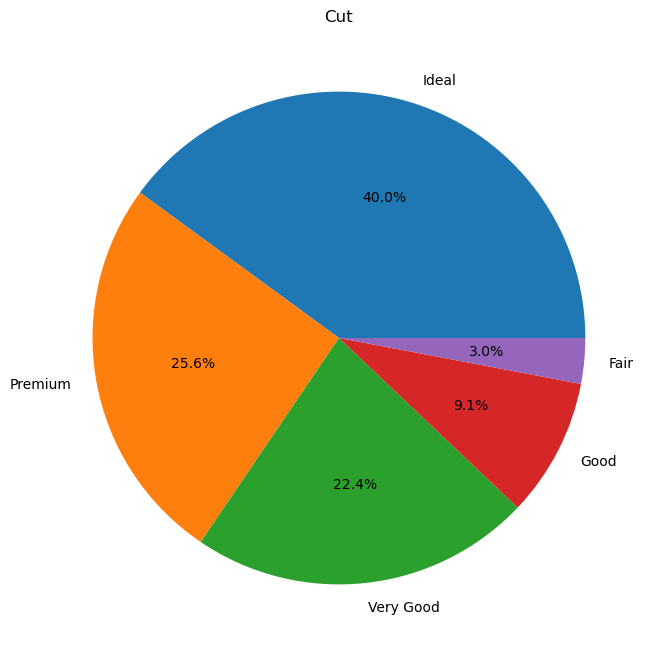

In [15]:
plt.figure(figsize=(8, 8))
plt.pie(dataframe['cut'].value_counts(), labels=['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], autopct='%1.1f%%')
plt.title('Cut')
plt.show()

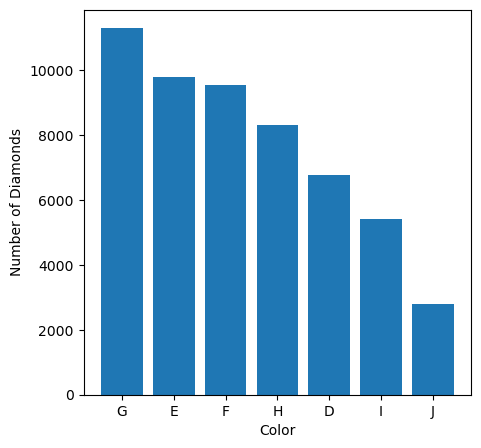

In [16]:
plt.figure(figsize=(5, 5))
plt.bar(dataframe['color'].value_counts().index, dataframe['color'].value_counts())
plt.ylabel('Number of Diamonds')
plt.xlabel('Color')
plt.show()

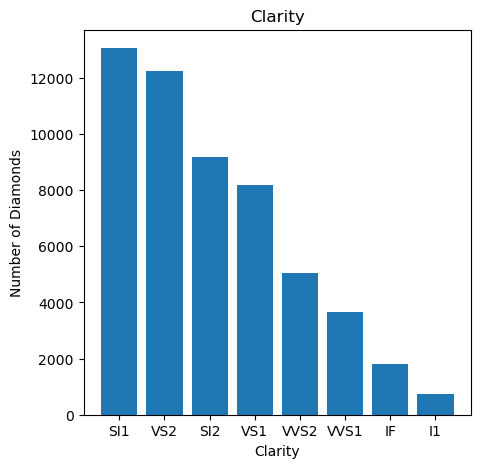

In [17]:
plt.figure(figsize=(5, 5))
plt.bar(dataframe['clarity'].value_counts().index, dataframe['clarity'].value_counts())
plt.title('Clarity')
plt.ylabel('Number of Diamonds')
plt.xlabel('Clarity')
plt.show()

Text(0.5, 1.0, 'Class Frequencies of the Cut Variable')

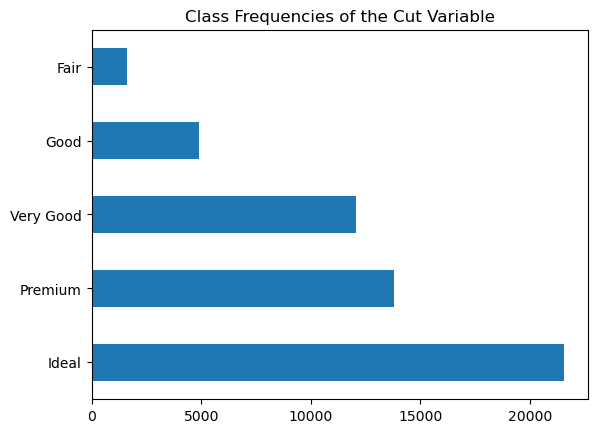

In [18]:
dataframe['cut'].value_counts().plot.barh().set_title('Class Frequencies of the Cut Variable')

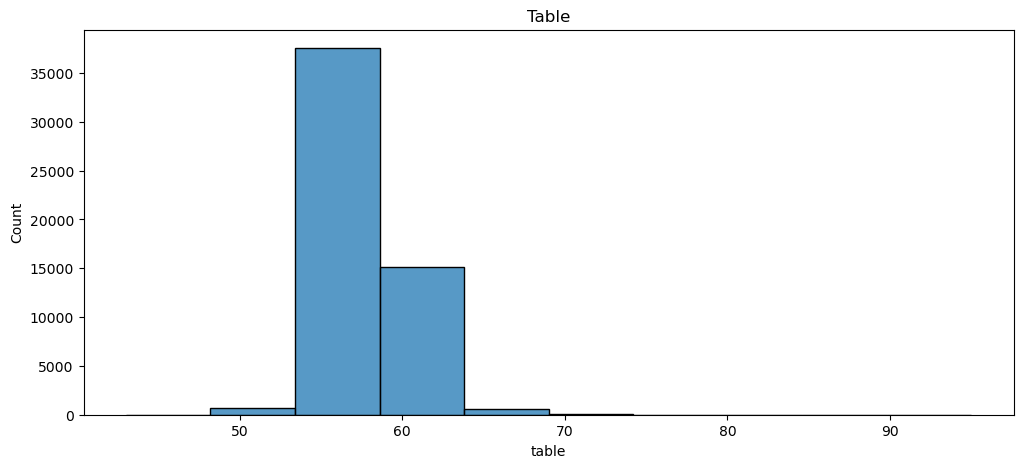

In [19]:
plt.figure(figsize=(12, 5))
sns.histplot(dataframe['table'], bins=10)
plt.title('Table')
plt.show()

#### 3.1.2 Grouped Visualization:

Grouped visualizations in the 'Predicting Diamond Price' project's EDA unveil attribute interactive within categorical categories like 'cut', 'color', 'clarity'. These visualizations, including box plots, bar charts, scatter plots with hues, and more offer insights into how attribute influence diamond prices across distinct groups. They provide a nuanced understanding of relationships, aiding data preprocessing and model construction decisions.

<AxesSubplot:xlabel='cut', ylabel='price'>

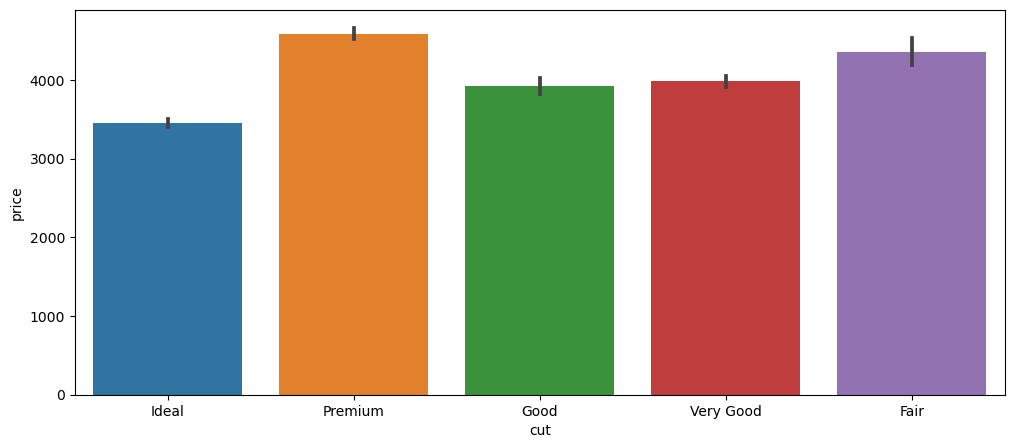

In [20]:
plt.figure(figsize=(12, 5))
sns.barplot(x='cut', y='price', data=dataframe)

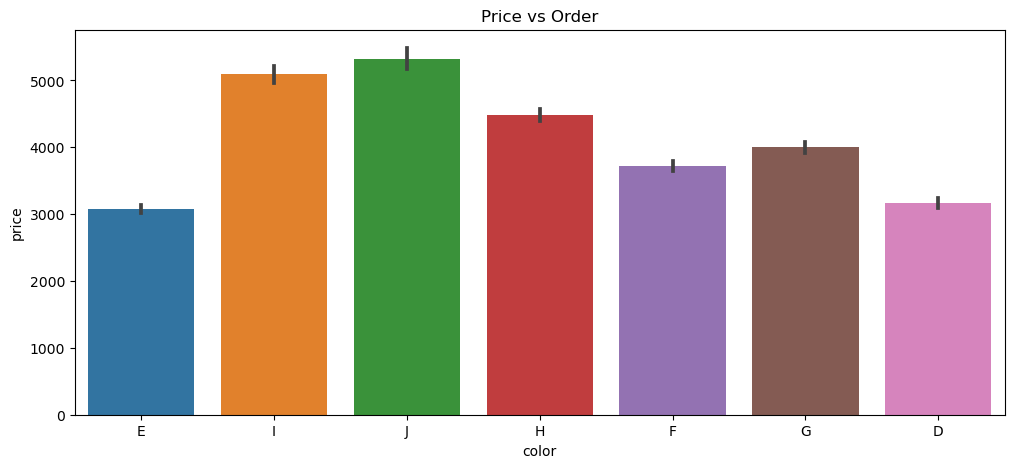

In [21]:
plt.figure(figsize=(12, 5))
sns.barplot(x='color', y='price', data=dataframe)
plt.title('Price vs Order')
plt.show()

Text(0.5, 1.0, 'Cut - Price - Color')

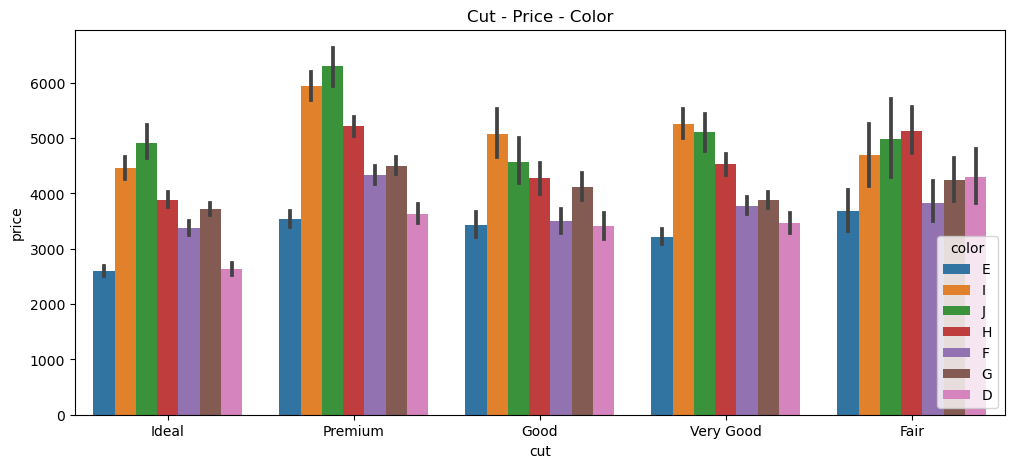

In [22]:
plt.figure(figsize=(12, 5))
sns.barplot(x='cut', y='price', hue='color', data=dataframe)
plt.title('Cut - Price - Color')

Text(0.5, 1.0, 'Cut - Price - Clarity')

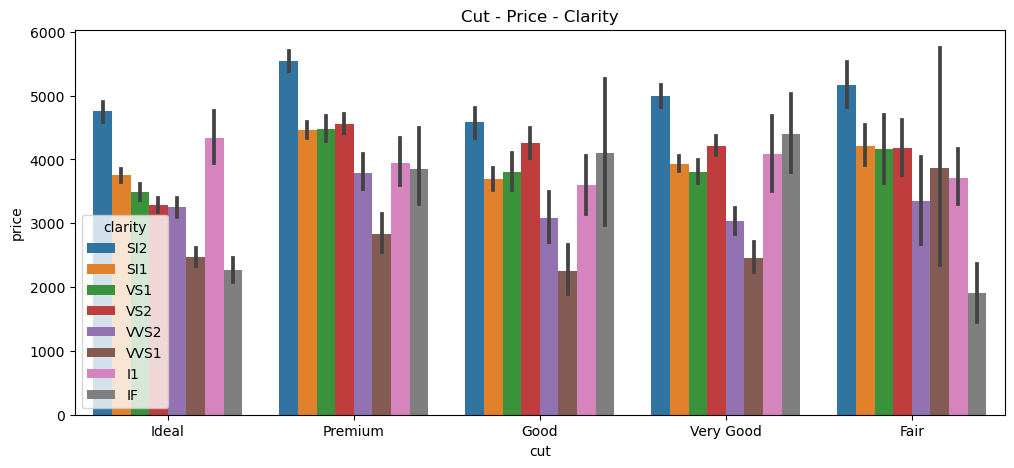

In [23]:
plt.figure(figsize=(12, 5))
sns.barplot(x='cut', y='price', hue='clarity', data=dataframe)
plt.title('Cut - Price - Clarity')

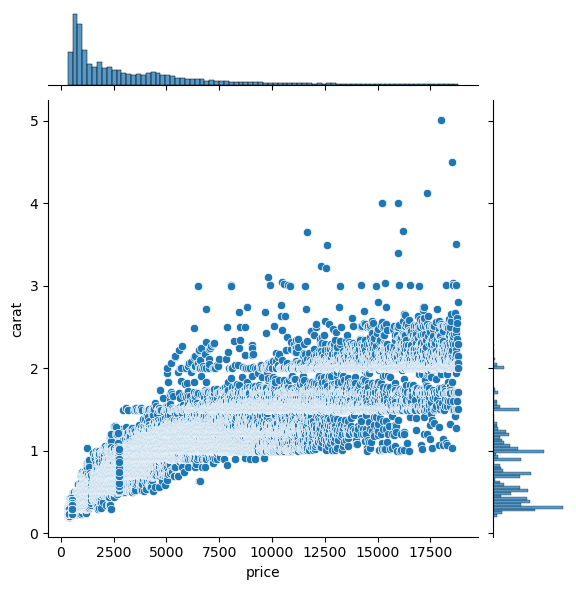

In [24]:
sns.jointplot(x='price', y=dataframe['carat'], data =dataframe)

#### 3.2 Data Preprocessing:
Data preprocessing is a fundamental step in the predicting diamond price project involving measures like handling missing values, managing outliers, feature engineering, encoding categorical variables, and scaling features. This process enhances dataset quality, ensures compatibility with machine learning algorithms, and forms the basis for accurate predictive modeling.

In [25]:
dataframe['cut'] = dataframe['cut'].map({'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair':1})

dataframe['color'] = dataframe['color'].map({'D': 7, 'E': 6, 'F': 5, 'G': 4, 'H': 3, 'I': 2, 'J': 1})

dataframe['clarity'] = dataframe['clarity'].map({'IF':8,'VVS1':7,'VVS2':6,'VS1':5,'VS2':4,'SI1':3,'SI2':2,'I1':1})

In [26]:
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


#### 3.2.1 Statical Info:

Statistical information is pivotal in the 'Predicting Diamond Price' project's EDA. Measures like mean, median, and standard deviation offer central tendencies and spread insights. Percentiles, skewness, and kurtosis illuminate data distribution and shape. Statistical insights guide subsequent analysis, visualization, and preprocessing steps.

In [27]:
dataframe.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


#### 3.2.2 Correlation:
Correlation values highlight how attributes interact, aiding in feature selection, preprocessing, and even new feature creation. Heatmaps visualize correlations, guiding attribute choices and addressing multicollinearity. This analysis informs model development, ensuring accurate prediction of diamond prices.

In [28]:
corr_dataframe = dataframe.corr()

In [29]:
corr_dataframe

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.352841,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.189175,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.025631,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.352841,0.189175,-0.025631,1.000000,-0.067384,-0.160327,-0.146800,-0.371999,-0.358420,-0.366952
depth,0.028224,-0.218055,-0.047279,-0.067384,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.433405,-0.026465,-0.160327,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.053491,-0.172511,-0.146800,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.371999,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.358420,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.366952,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

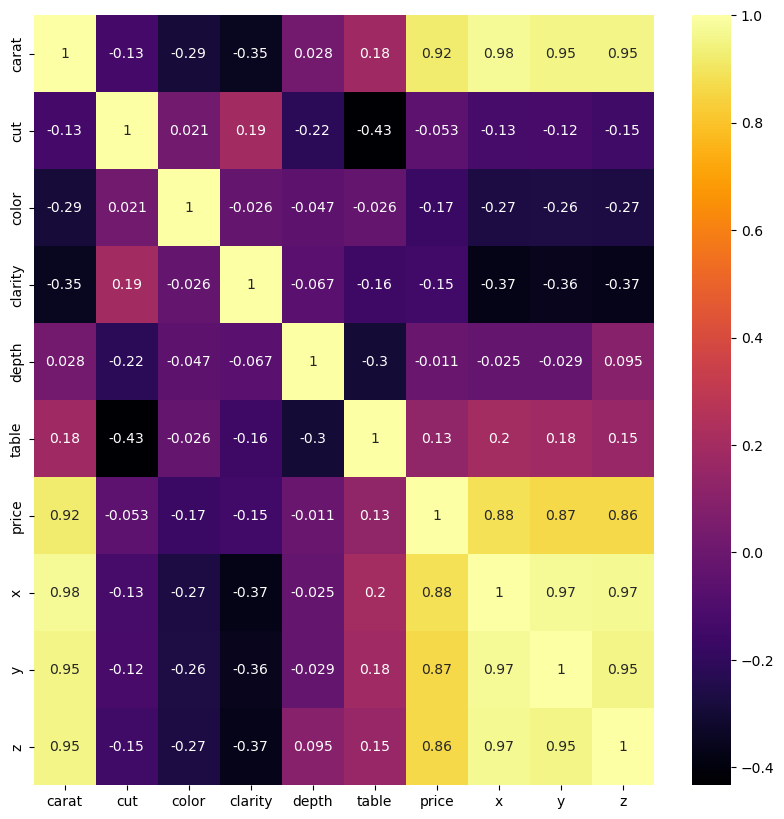

In [30]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_dataframe, annot=True, cmap= 'inferno')

In [31]:
dataframe.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [32]:
dataset = dataframe.drop('price', axis=1)

In [33]:
dataset.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,5,6,2,61.5,55.0,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,4.34,4.35,2.75


#### 3.2.2.1 Correlation of Diamond Price with Various Attributes:

<AxesSubplot:title={'center':'Correlation with Price'}>

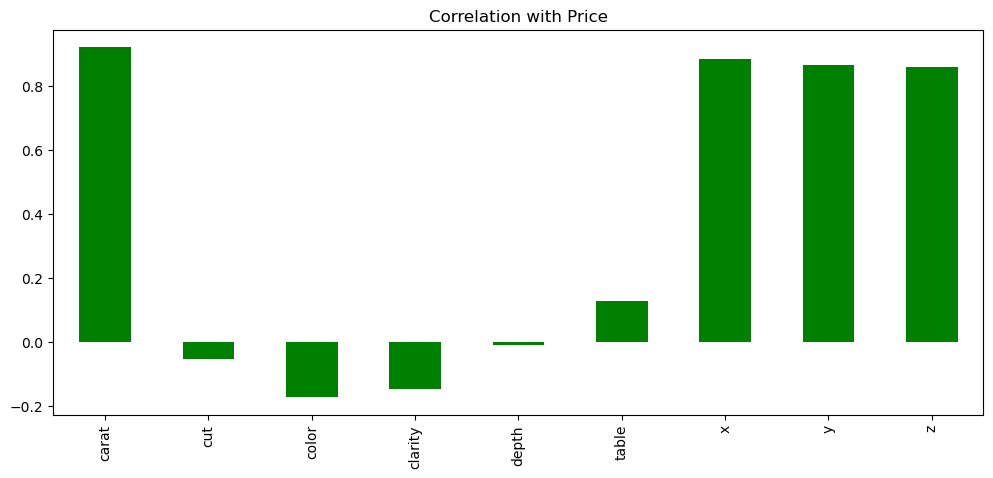

In [34]:
dataset.corrwith(dataframe['price']).plot.bar(
    figsize = (12, 5),
    title = 'Correlation with Price',
    cmap ='ocean'
)

#### 3.2.2.2 Relation Between Price and Caret:

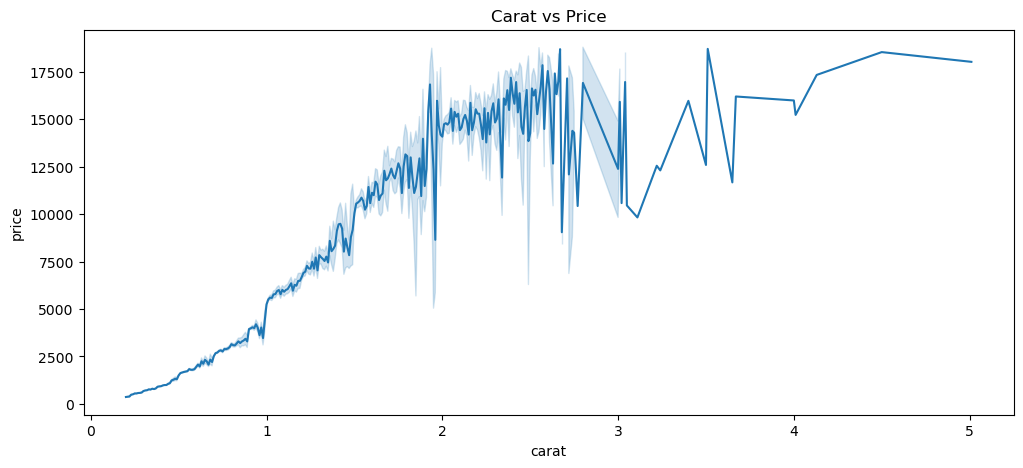

In [35]:
plt.figure(figsize=(12, 5))
sns.lineplot(x='carat', y='price', data=dataframe)
plt.title('Carat vs Price')
plt.show()

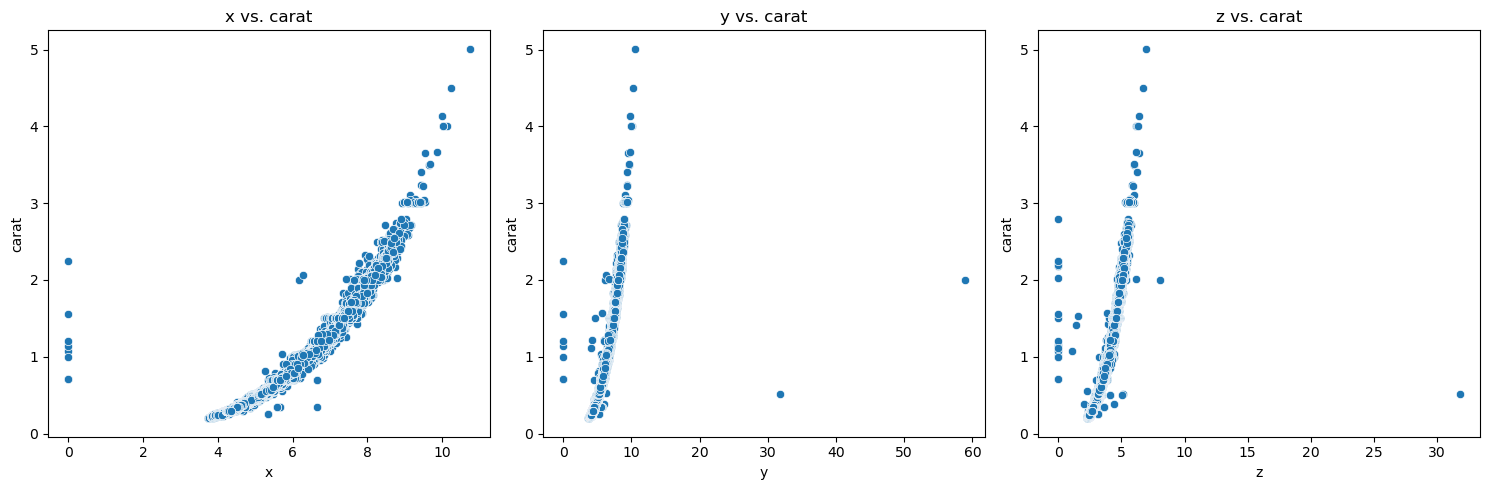

In [37]:
columns_to_plot = ['x', 'y', 'z']
titles = ['x vs. carat', 'y vs. carat', 'z vs. carat']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x=column, y='carat', data=dataframe, ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

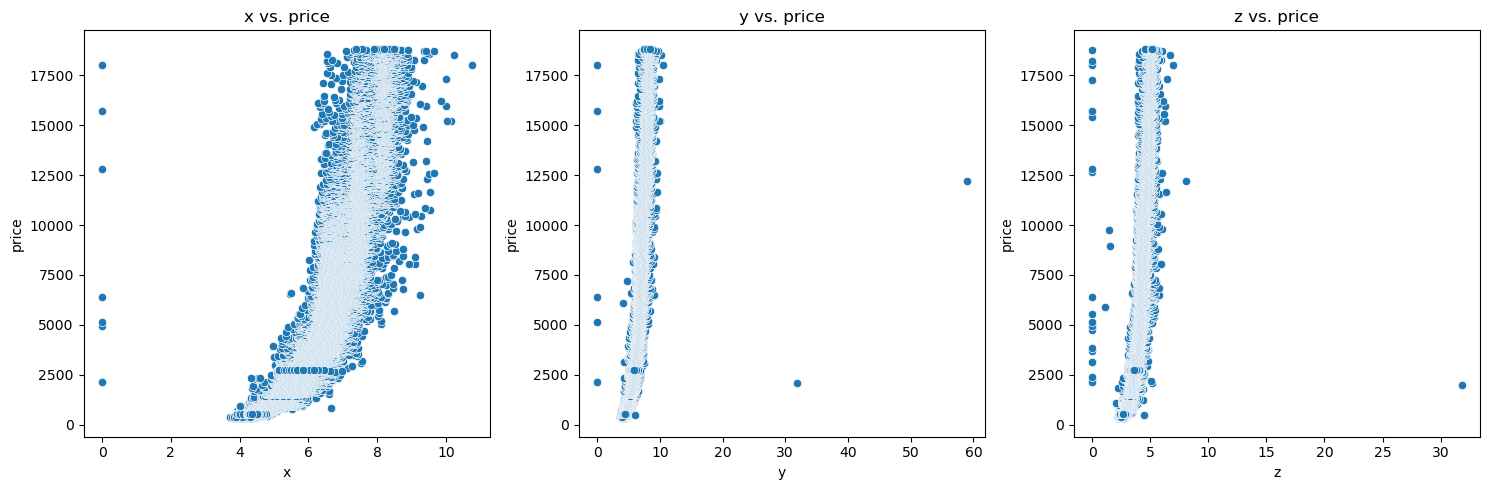

In [38]:
columns_to_plot = ['x', 'y', 'z']
titles = ['x vs. price', 'y vs. price', 'z vs. price']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x=column, y='price', data=dataframe, ax=axes[i])
    axes[i].set_title(titles[i])

plt.tight_layout()
plt.show()

In [39]:
dataframe.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


#### 3.3 Splitting Dataset:
Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The mose common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities. <br>

**Train-Test Split:** This is the most basic type of split, where the dataset is divided into a training set and a testing test. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [40]:
x = dataframe.drop('price', axis=1)
y = dataframe['price']

In [41]:
x.shape, y.shape

((53940, 9), (53940,))

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [44]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((43152, 9), (10788, 9), (43152,), (10788,))

#### 4. Model Selection and Training:
**Model Selection:** <br>
Model selection involves choosing the best algorithm or model architecture for the given problem and dataset. This step requires careful consideration of various factors, such as the nature of the data (e.g. numerical or categorical), the problem type (e.g. regression, classification, clustering), the amount of available data, and the desired model performance. It is essential to select a model that can effectively capture the underlying patterns in the data and make accurate predictions. <br>

**Model Training:** <br>
Once the appropriate model has been selected, the next step is to train it on the data. Model training involves adjusting the model's parameters using the training data to make accurate predictions on unseen data. The goal is to minimize the difference between the model's predictions and the actual target values during training.

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
DTR = DecisionTreeRegressor()

In [47]:
DTR.fit(x_train, y_train)

DecisionTreeRegressor()

In [48]:
DTR.score(x_test, y_test)

0.9662139567949262

In [49]:
DTR.score(x_train, y_train)

0.9999948355708338

In [50]:
y_pred_DTR = DTR.predict(x_test)

In [51]:
y_pred_DTR

array([ 559., 2321., 1238., ...,  642., 9032., 4130.])

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

c:\Users\cW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\cW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


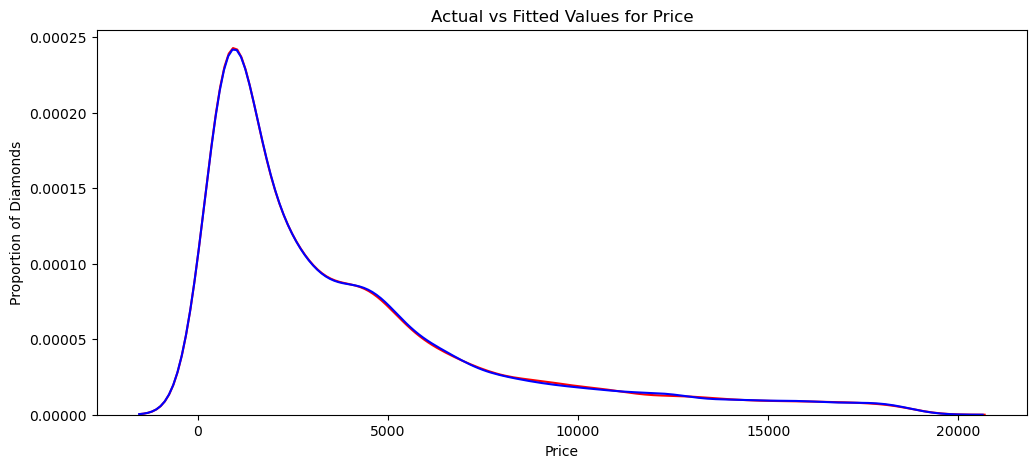

In [54]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(y_test, hist=False, color='r', label='Actual Vale')
sns.distplot(y_pred_DTR, hist=False, color='b', label='Fitted Values', ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

In [55]:
from sklearn.ensemble import RandomForestRegressor

In [56]:
reg = RandomForestRegressor()

In [57]:
reg.fit(x_train, y_train)

RandomForestRegressor()

In [58]:
reg.score(x_test, y_test)

0.9815309975480854

In [59]:
reg.score(x_train, y_train)

0.9974289253474196

In [60]:
y_pred_reg = reg.predict(x_test)

In [61]:
y_pred_reg

array([ 555.4 , 2373.37, 1216.59, ...,  737.14, 9592.27, 3874.62])

c:\Users\cW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\cW\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


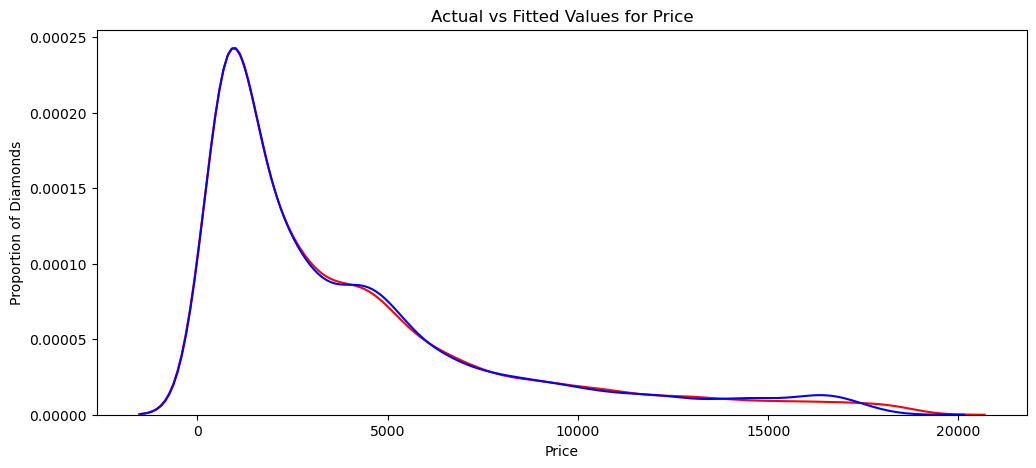

In [62]:
plt.figure(figsize=(12, 5))
ax = sns.distplot(y_test, hist=False, color='r', label='Actual Value')
sns.distplot(y_pred_reg, hist=False, color='b', label='Fitted Value', ax=ax)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Diamonds')
plt.show()

## Conclusion:
Both the models have almost same accuracy. However, the Random Forest Regressor model is slightly better than the Decision Tree Regressor model.